Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk 
import tensorflow as tf
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

C:\Users\HP\AppData\Local\Temp\ipykernel_1976\3231901630.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Tensorflow Version 2.16.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('training.1600000.processed.noemoticonwWthStemmedContent.csv',
                 )
df.head()

,target,id,data,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [3]:
lab_to_sentiment = {0: "Negative", 1: "Positive"}

def label_decoder(label):
  if label in lab_to_sentiment:
    return lab_to_sentiment[label]
  else:
    return "Unknown"

df.target = df.target.apply(lambda x: label_decoder(x))
df.head()

,target,id,data,flag,user,text,stemmed_content
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


Text(0.5, 1.0, 'Sentiment Data Distribution')

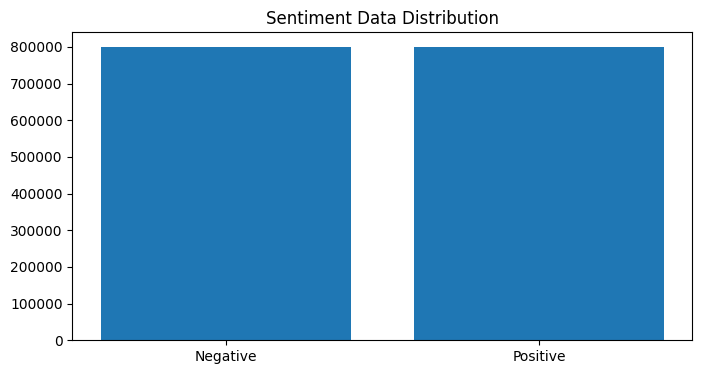

In [4]:
val_count = df.target.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [5]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,target,id,data,flag,user,text,stemmed_content
1424828,Positive,2058931690,Sat Jun 06 15:54:55 PDT 2009,NO_QUERY,ImMisti,@MarinaStMark best wedding ever... Until next ...,marinastmark best wed ever next sunday
970461,Positive,1828039040,Sun May 17 11:58:00 PDT 2009,NO_QUERY,AYEkim,my babycuzzzin felecia makes my day SHINE,babycuzzzin felecia make day shine
721121,Negative,2261098282,Sat Jun 20 20:15:35 PDT 2009,NO_QUERY,SisiAbebi,fell down concrete steps after a crazy nite of...,fell concret step crazi nite parti hand kill x...
875164,Positive,1680312800,Sat May 02 11:23:33 PDT 2009,NO_QUERY,fuzzymuffins,chipotle rebranded. they now have a pepper tha...,chipotl rebrand pepper look like poop
1005146,Positive,1880484196,Fri May 22 01:24:27 PDT 2009,NO_QUERY,Saracen5,@ahblessgirl hee hee carbon footprint halved,ahblessgirl hee hee carbon footprint halv
1322368,Positive,2014786060,Wed Jun 03 02:40:59 PDT 2009,NO_QUERY,vipvirtualsols,STILL one of my fav twitter videos and worth r...,still one fav twitter video worth retweet lurv...
456251,Negative,2071216230,Sun Jun 07 19:01:47 PDT 2009,NO_QUERY,tarksiala,I cant configure Disiqe with Cupe Cafe Reciever,cant configur disiq cupe cafe reciev
74150,Negative,1694724959,Mon May 04 03:52:43 PDT 2009,NO_QUERY,Xyphias,"Ah, i've got the flu (not swine or anything ju...",ah got flu swine anyth normal stuff fun crept ...
37470,Negative,1572978870,Mon Apr 20 23:14:46 PDT 2009,NO_QUERY,emmaguy,off to print #dissertation for 10pm. There had...,print dissert pm better ink paper
553109,Negative,2203550367,Tue Jun 16 23:59:42 PDT 2009,NO_QUERY,SenaiTheGuy,"gotta go do some h/work now , and get some sl...",gotta go h work get sleep big game morrow


In [6]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_1976\3341848437.py:4: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [7]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [8]:
df.text = df.text.apply(lambda x: preprocess(x))


In [9]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\gensim-4.3.2-py3.12-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


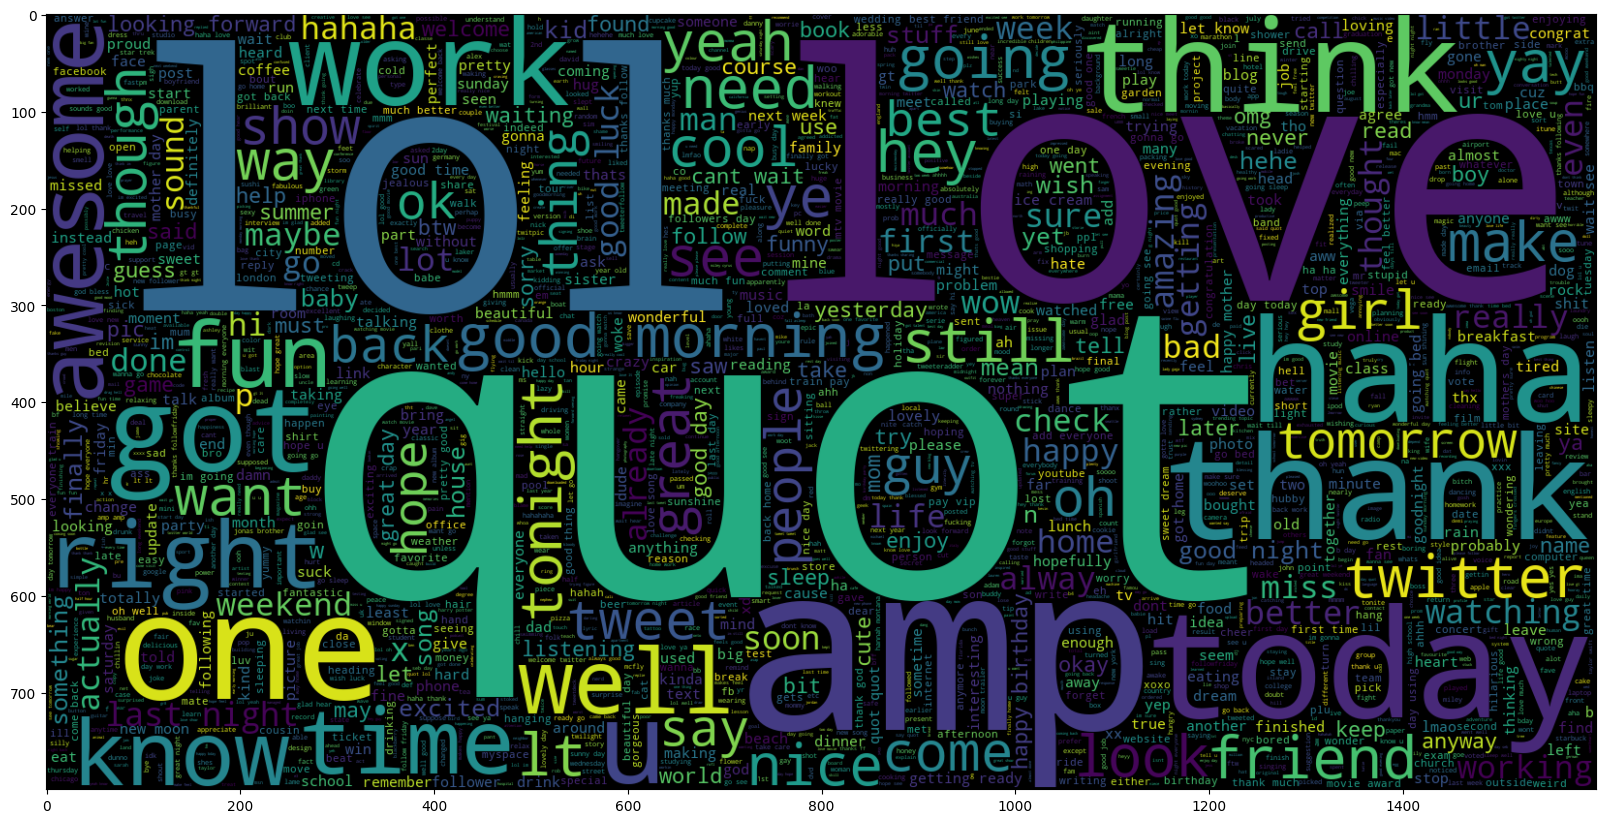

In [10]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

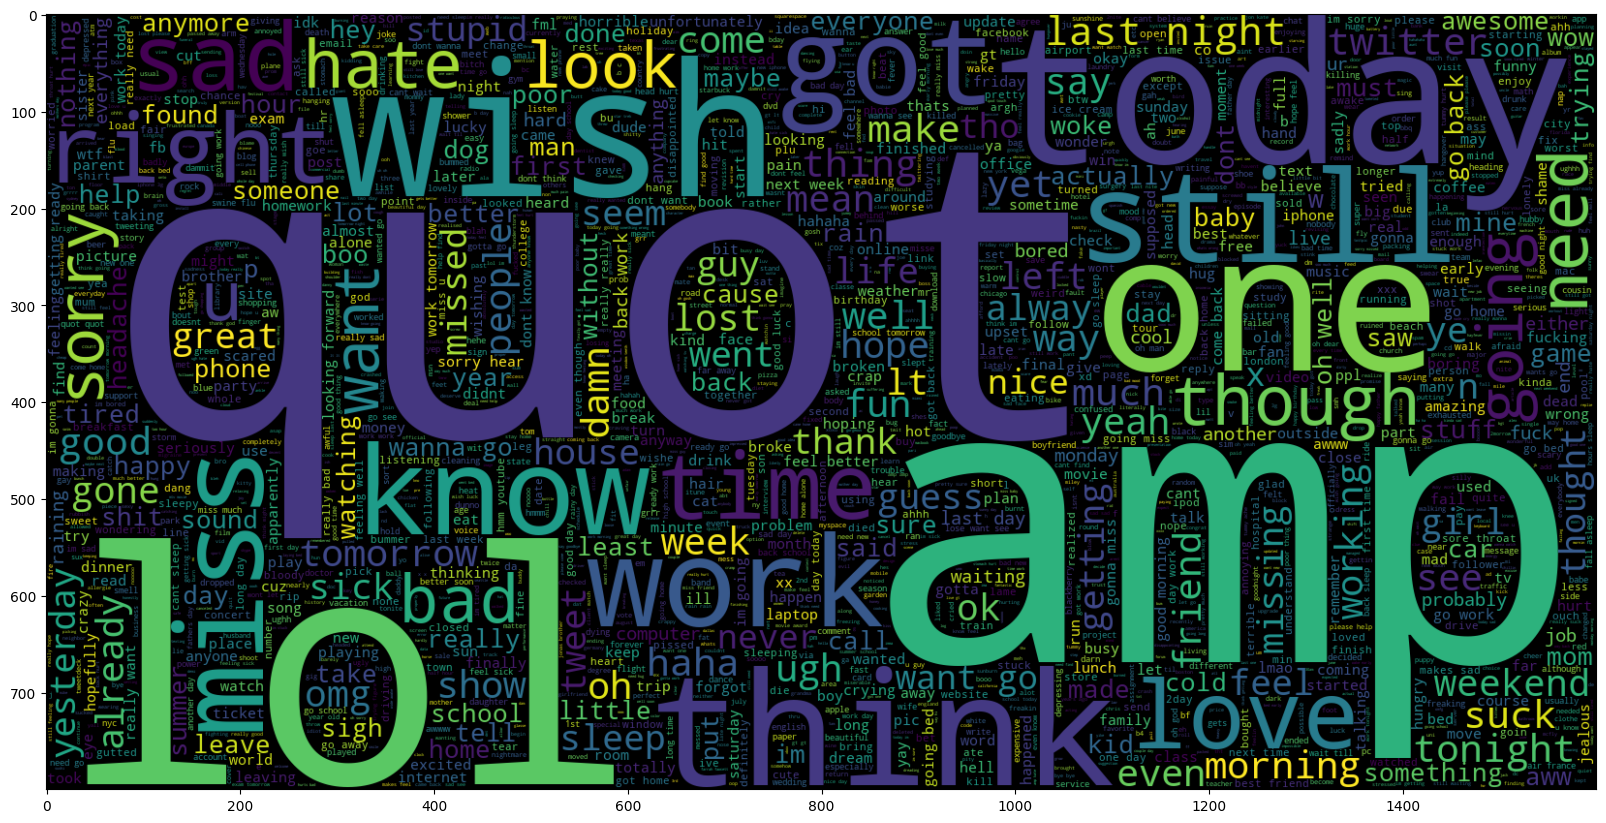

In [11]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [12]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [13]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [14]:
train_data.head(10)


,target,id,data,flag,user,text,stemmed_content
23786,Negative,1557814017,Sun Apr 19 06:07:16 PDT 2009,NO_QUERY,anfieldchick,need friends,need friend
182699,Negative,1967234035,Fri May 29 19:12:32 PDT 2009,NO_QUERY,carolinee82,im trying call impossible,iamthecommodor im tri call imposs
476661,Negative,2177945142,Mon Jun 15 06:57:29 PDT 2009,NO_QUERY,lynnmclellan,good pace going 3k 13 min missed 5k turn ended...,davemclellan good pace go k min miss k turn en...
1181490,Positive,1982098562,Sun May 31 10:31:26 PDT 2009,NO_QUERY,Naimahkinz,u gonna shows ny soon luv see u live,bhinesther u gonna show ny soon luv see u live
878773,Positive,1685305511,Sat May 02 23:50:16 PDT 2009,NO_QUERY,primehex,hell yea get em tattoos ink free wish parents ...,buenoby hell yea get em tattoo ink free wish p...
130866,Negative,1835398318,Mon May 18 05:54:07 PDT 2009,NO_QUERY,fanfrkntastic,yeah need 2 see ur mom calls back first rememb...,yeah need see ur mom call back first remembr s...
1235876,Positive,1992688660,Mon Jun 01 09:09:47 PDT 2009,NO_QUERY,ktbeeper,sounds like cup tea sign,anniemcbeth sound like cup tea sign
717314,Negative,2259961919,Sat Jun 20 18:26:50 PDT 2009,NO_QUERY,guitarstikibars,tired want sleep wtf,tire want sleep wtf
969880,Positive,1827987609,Sun May 17 11:51:37 PDT 2009,NO_QUERY,susanananananaa,amazing wish,lilyroseallen http twitpic com dflq amaz wish
748698,Negative,2284535685,Mon Jun 22 14:00:12 PDT 2009,NO_QUERY,BethTN09,thank god wkrn abc affiliate nashville back mi...,thank god wkrn abc affili nashvil back miss so...


In [15]:
train_data.head(10)


,target,id,data,flag,user,text,stemmed_content
23786,Negative,1557814017,Sun Apr 19 06:07:16 PDT 2009,NO_QUERY,anfieldchick,need friends,need friend
182699,Negative,1967234035,Fri May 29 19:12:32 PDT 2009,NO_QUERY,carolinee82,im trying call impossible,iamthecommodor im tri call imposs
476661,Negative,2177945142,Mon Jun 15 06:57:29 PDT 2009,NO_QUERY,lynnmclellan,good pace going 3k 13 min missed 5k turn ended...,davemclellan good pace go k min miss k turn en...
1181490,Positive,1982098562,Sun May 31 10:31:26 PDT 2009,NO_QUERY,Naimahkinz,u gonna shows ny soon luv see u live,bhinesther u gonna show ny soon luv see u live
878773,Positive,1685305511,Sat May 02 23:50:16 PDT 2009,NO_QUERY,primehex,hell yea get em tattoos ink free wish parents ...,buenoby hell yea get em tattoo ink free wish p...
130866,Negative,1835398318,Mon May 18 05:54:07 PDT 2009,NO_QUERY,fanfrkntastic,yeah need 2 see ur mom calls back first rememb...,yeah need see ur mom call back first remembr s...
1235876,Positive,1992688660,Mon Jun 01 09:09:47 PDT 2009,NO_QUERY,ktbeeper,sounds like cup tea sign,anniemcbeth sound like cup tea sign
717314,Negative,2259961919,Sat Jun 20 18:26:50 PDT 2009,NO_QUERY,guitarstikibars,tired want sleep wtf,tire want sleep wtf
969880,Positive,1827987609,Sun May 17 11:51:37 PDT 2009,NO_QUERY,susanananananaa,amazing wish,lilyroseallen http twitpic com dflq amaz wish
748698,Negative,2284535685,Mon Jun 22 14:00:12 PDT 2009,NO_QUERY,BethTN09,thank god wkrn abc affiliate nashville back mi...,thank god wkrn abc affili nashvil back miss so...


In [16]:
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\gensim-4.3.2-py3.12-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\gensim-4.3.2-py3.12-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)


Vocabulary Size : 290575


In [18]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [19]:
labels = train_data.target.unique().tolist()


In [20]:
encoder = LabelEncoder()
encoder.fit(train_data.target.to_list())

y_train = encoder.transform(train_data.target.to_list())
y_test = encoder.transform(test_data.target.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [21]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 1
MODEL_PATH = 'best_model.hdf5'

In [22]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding='utf-8')
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [23]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [24]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          trainable=False)

In [25]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [28]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [29]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=10,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 863s 687ms/step - accuracy: 0.7454 - loss: 0.5016 - val_accuracy: 0.7908 - val_loss: 0.4449 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 852s 682ms/step - accuracy: 0.8180 - loss: 0.3980 - val_accuracy: 0.7869 - val_loss: 0.4543 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 857s 685ms/step - accuracy: 0.8521 - loss: 0.3338 - val_accuracy: 0.7827 - val_loss: 0.4860 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 900s 720ms/step - accuracy: 0.8768 - loss: 0.2806 - val_accuracy: 0.7789 - val_loss: 0.5202 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 866s 693ms/step - accuracy: 0.8929 - loss: 0.2453 - val_accuracy: 0.7752 - val_loss: 0.5990 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 807s 645ms/step - accuracy: 0.9029 - loss: 0.2218 - val_accuracy: 0.7735 - val_loss: 0.6522 - learning_rate: 0.0010
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 770s 616ms

In [75]:
import pickle

# Assuming 'history' is the object returned by model.fit()
with open('training_history.pickle', 'wb') as file:
    pickle.dump(history.history, file)


In [80]:
import pickle

# Load the history object
with open('training_history.pickle', 'rb') as file:
    loaded_history = pickle.load(file)


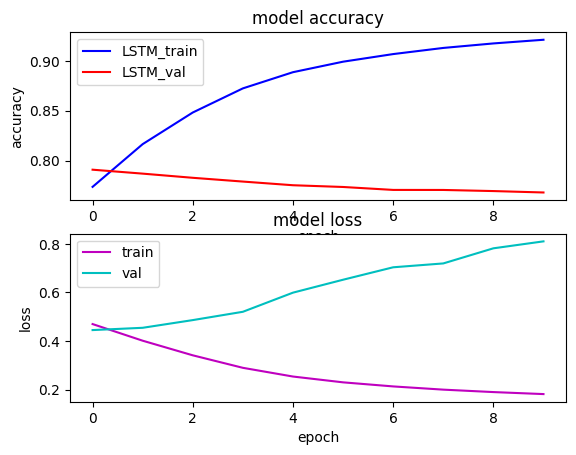

In [82]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [103]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define the word to test
word_to_test = "the ferrari car fast but is heavy"

# Tokenize the word
tokenized_word = tokenizer.texts_to_sequences([word_to_test])

# Pad or truncate the tokenized sequence to match the input size of your model
max_sequence_length = 200  # Assuming the maximum sequence length used during training is 200
padded_word = pad_sequences(tokenized_word, maxlen=max_sequence_length)

# Use the trained model to predict the sentiment of the input word
prediction = model.predict(padded_word)

# Convert the prediction to sentiment label
sentiment_label = "Positive" if prediction[0][0] > 0.5 else "Negative"
confidence = np.abs(0.5 - prediction[0][0])

print(f"The sentiment of '{word_to_test}' is predicted as: {sentiment_label} with {confidence * 100:.2f}% confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
The sentiment of 'the ferrari car fast but is heavy' is predicted as: Negative with 35.47% confidence.


In [31]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 654ms/step


In [32]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

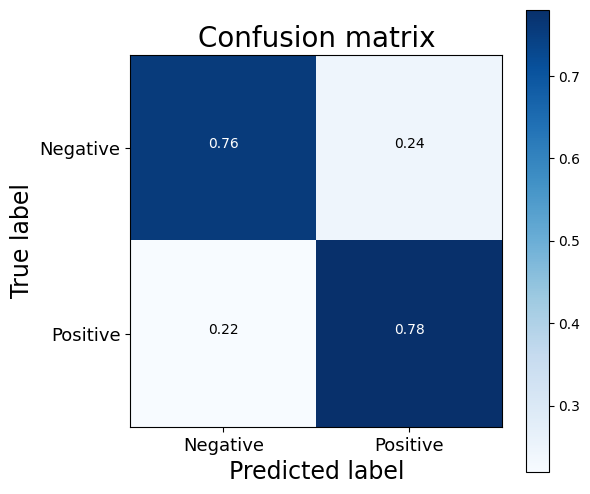

In [57]:
cnf_matrix = confusion_matrix(test_data.target.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.target.unique(), title="Confusion matrix")
plt.show()

In [36]:
print(classification_report(list(test_data.target), y_pred_1d))


              precision    recall  f1-score   support

    Negative       0.78      0.76      0.77    160542
    Positive       0.76      0.78      0.77    159458

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

